# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

#### Réponse:
Import du DF et affichage de ses 5 premières lignes.

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv')
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

#### Réponse:
Le nombre d'observation est le nombre de lignes du dataframe df, donné par la fonctions shape().

Par ailleurs, df.isnull() nous donne une matrice de la taille de df où est labélisé "True" si la valeur 
est manquante et "False" dans le cas contraire.
<br>En effetuant 2 fois une somme sur cette matrice, les valeurs "True" sont additionnées une premièere fois sur
les lignes, puis sur les colonnes. Ceci nous donne le nombre total de "True" dans le df et donc de valeurs
manquantes.

In [3]:

if df.isnull().sum().sum() > 0:
    print('Il y a {0} observations et {1:3d} valeurs manquantes dans ce dataset.'
          .format(df.shape[0],df.isnull().sum().sum()))
    
else: # Dans le cas où il n'y a pas de valeurs manquantes.
    print('Il y a {} observations et AUCUNE valeur manquante dans ce dataset.'.format(df.shape[0]))



Il y a 9582 observations et 130 valeurs manquantes dans ce dataset.


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

#### Réponse:

La colomne "Experience" comportant des chiffres en type string, il est nécessaire de les changer en
type Float afin de pouvoir les traiter en tant que nombres.

Un fois que celà est fait dans la colonne "Exp_float", les valeurs médiane et moyenne de la Series 
peuvent être calculées. Les valeurs manquantes en expérience pour les profils demandés sont remplacées
par les valeurs calculées.

La réponse est formulée sous forme de fonction afin que celle-ci puisse être réutilisée dans la suite 
de ce test.

In [7]:

def fill_na(df):
    df['Exp_float']=df['Experience'].str.replace(",", ".").astype(float)

    median=df['Exp_float'].median()
    mean=df['Exp_float'].mean()

    df.loc[(df.Metier=='Data scientist')& (np.isnan(df.Exp_float)), 'Exp_float'] = median 
    df.loc[(df.Metier=='Data engineer')& (np.isnan(df.Exp_float)), 'Exp_float'] = mean
    
    return df

df=fill_na(df)

df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_float
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris,1.0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille,3.0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes,3.0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille,1.5
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux,2.0
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille,6.0
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille,0.0
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse,4.0
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris,8.0
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse,5.0


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

#### Réponse:

La méthode groupby() permet de regrouper les profils en fontion d'une colonne choisie.
Ici la colonne choisie est celle du 'Métier'. <br>Les profils sont ainsi regroupés par métier.
Les moyennes d'années d'expérience de chaque groupe sont calculées et imprimées.

In [8]:

# Groupes par métier et moyenne.
year_means=df.groupby('Metier')['Exp_float'].mean()


print('''Les Data Scientists ont en moyenne %.2f années d'experience.
Les Lead data scientists ont en moyenne %.2f années d'experience.
Les Data engineers ont en moyenne %.2f années d'experience.
Les Data architectes ont en moyenne %.2f années d'experience.'''
      %(year_means['Data scientist'],year_means['Lead data scientist'],
        year_means['Data engineer'],year_means['Data architecte']))

Les Data Scientists ont en moyenne 2.24 années d'experience.
Les Lead data scientists ont en moyenne 3.97 années d'experience.
Les Data engineers ont en moyenne 2.98 années d'experience.
Les Data architectes ont en moyenne 3.00 années d'experience.


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

#### Réponse:

La Series year_means de la réponse précédente est réutilisée ici. 
Le graphique est construit sous Seaborn.

Un diagramme à barre a été choisi pour la représentation car il est plus facile
de visualiser la différence d'année d'expérience entre chaque métier.

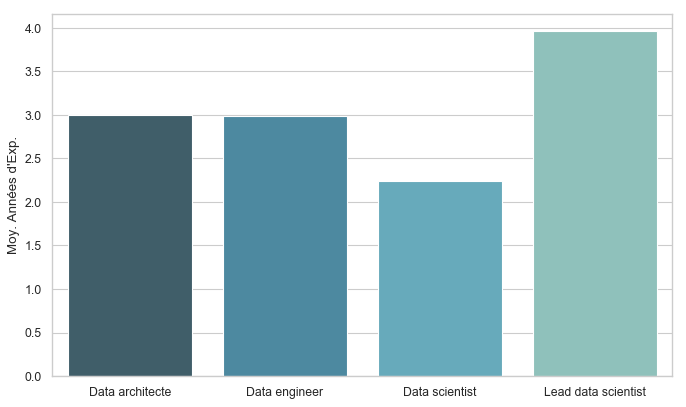

In [14]:

# Réglage du fond de graphique et création de la figure
sb.set(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi=80)


# Construction du graphique en barre. 
ax=sb.barplot(x=year_means.index, y=year_means.values, palette='GnBu_d')
ax.set(xlabel='', ylabel="Moy. Années d'Exp.")
pass

Le résultat est cohérent. On voit bien par exemple que le Lead Data Scientist 
a plus d'années d'expérience que les autres métiers.

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

#### Réponse:

Afin de traiter cette question, les données de 'Exp_float' - la colonne reprenant
les données de 'Experience' en type float - sont divisées en 4 intervalles réguliers 
entre la valeur minimale et la valeur maximale de la Series. <br>Les occurences des années d'expériences ne sont pas prises en compte dans la régle. 
Et ce puisque le jugement de l'expérience n'est dépendant que du profil jugé et pas des 
expériences des autres profils.

Les 4 intervalles sont ensuite utilisés pour juger de l'Expérience du profil. 
La fonction pd.cut() offre la possibilité de couper une Series en des intervalles
spécifiés afin d'allouer à chaque intervalle un label. 

In [11]:

# Calcul des frontiéres d'intervalles. 
maxi=df['Exp_float'].max()
mini=df['Exp_float'].min()
mid=maxi/2 ; quart1=mid/2 ; quart3=maxi-quart1


# Discrétisation de la Series et allocation de label. 
df['Exp_label'] = pd.cut(df.Exp_float,bins=[mini-1, quart1, mid, quart3, maxi+1],
                     labels=['débutant','confirmé','avancé','expert'])

df.head(10)


,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_float,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris,1.0,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille,3.0,débutant
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes,3.0,débutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille,1.5,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux,2.0,débutant
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille,6.0,confirmé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille,0.0,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse,4.0,débutant
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris,8.0,confirmé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse,5.0,débutant


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

#### Réponse:

Premiérement, les technologies de chaque profil sont isolée puis listées dans tech_conc.
Ensuite, les occurences des technologies sont calculées et triées par ordre décroissant. 
Enfin les 5 technologies les plus fréquentes sont identifiées et affichées sur un graphique.

Dans la seconde étape (calcul et tri des occurences), il aurait été possible d'utiliser 
collections.Counter() pour éviter la boucle for. Mais la librairie collections n'est pas 
importée dans ce Notebook.

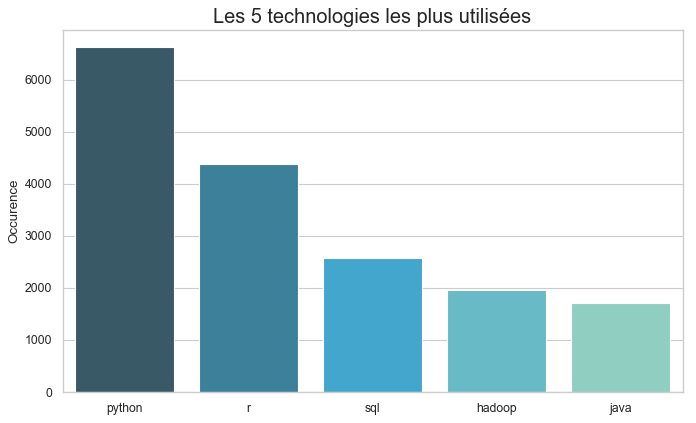

In [13]:

# Listage des technologies dans tech_conc.
df['Technologies'].replace(regex={'HADOOP\(HDFS\)': 'HADOOP', 'HDFS': 'HADOOP'}, inplace=True)
tech_list = [i.split('/') for i in df['Technologies'].tolist()] 
tech_conc=[j.lower() for i in tech_list for j in i]
compte = {k: tech_conc.count(k) for k in set(tech_conc)}

# Calcul et tri des occurences des technologies. 
common=[]
for tech in sorted(compte, key=compte.get, reverse=True):
    if tech != '':
          common.append((tech, compte[tech]))

# Affichage des 5 technologies les plus fréquentes sur un graphique.
fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi=80)

ax=sb.barplot(x=[i[0] for i in common[:5]], y=[i[1] for i in common[:5]],
              palette="GnBu_d",saturation=1)

ax.set(xlabel='', ylabel="Occurence")
ax.set_title('Les 5 technologies les plus utilisées',fontsize=18)
pass

Le résultat montre que Python, R, SQL, Java et Hadoop sont les 5 technologies
les plus utilisées. Ce résultat est cohérent puisque ce sont des technologies 
très sollicitées dans les métiers de Data Scientist, Enginneer et Analyst.

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

#### Réponse:

Afin de detecter 2 clusters dans les données fournies, du data mining et 
du data engineering est utilisé sur les données existantes. Les données sont 
nettoyées et éventuellement transformées de texte en données numériques.

Les features retenues pour cette étude sont:
- Diplôme,
- Technologies,
- Années d'expériences.

L'algorithme de clustering choisi est le K-Means. Cet algorithme partitionne
les données qui lui sont fournies en k clusters. La constante est k=2 dans cette étude.
L'algorithme trouve un centroïde pour chaque cluster après plusieurs itérations. Il 
labelise enfin chaque profil en fonction de sa distance aux centroïdes. Le centroïde
le plus proche attribue son cluster au profil. 

Le contrôle des clusters se fait ici en visualisant les données sur un graphique 2D. 
Pour permettre cela, la dimension des features est réduite à 2. Ainsi pour chaque 
profil on a une dim1 et une dim2. 
Ces données réduites sont utilisées pour faire tourner le k-means, ce qui réduit
son temps de processing. 

La visualisation aide à définir les clusters. Deux graphiques seront visualisés:

1- Données pca tracées labélisées par CLUSTER résultants du modèle k-means,
<br>2- Données pca tracées labélisées par METIER de chaque profil. 

Cette visualisation nous permettra de voir s'il y'a corrélation entre les clusters
et les métiers des profils. 

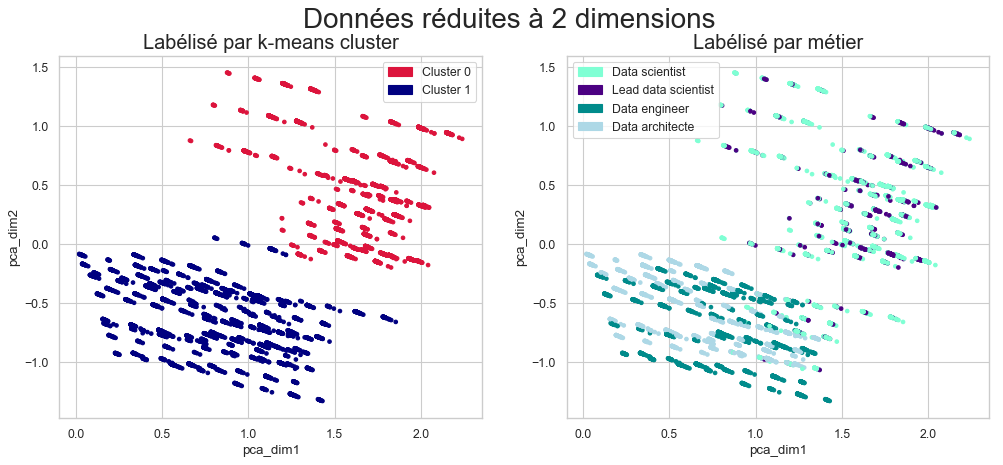

In [19]:

# Importation des set de méthodes de sklearn.
from sklearn import feature_extraction 
from sklearn import model_selection
from sklearn  import cluster
from sklearn  import preprocessing
from sklearn  import decomposition
from matplotlib import patches

# Import du dataframe "data.csv"
df = pd.read_csv('data.csv')

# Normalisation des années d'expériences
df=fill_na(df)  # Fonction de la question 3
df['Exp_float']=df['Exp_float']/(df['Exp_float'].max())


# Supression des NAN du dataframe sur 4 colomnes.
df=df.dropna(subset=['Technologies','Diplome','Exp_float','Metier']).reset_index(drop=True)


# Vectorisation des technologies par profil dans df_vect_tech
df['Technologies'].replace(regex={'HADOOP\(HDFS\)': 'HADOOP', 'HDFS': 'HADOOP'}, inplace=True)

count_tech = feature_extraction.text.CountVectorizer(token_pattern=r"[^/]+")

vect_tech= count_tech.fit_transform(df.Technologies.values)

df_vect_tech=pd.DataFrame(vect_tech.todense(), columns=count_tech.get_feature_names())


# Remplacement des diplômes par des valeurs continues.
"""
Ici le countvectorizer n'est pas nécessaire puisque les valeurs
des diplômes sont proportionnelles au niveau d'études.
"""
dict_dip={'No diploma':0,'Bachelor':1/3,'Master':2/3, 'Phd':1}

df['Diplome'].replace(dict_dip,inplace=True)


# Construction du df final qui servira au modèle de clustering
df_final = df[['Diplome','Exp_float']].join(df_vect_tech)


# Reduction de dimension de df_final afin de tracer les données sur un graphique 2D.
# Ici TruncatedSVD est utilisé à la place de PCA car df_final est une matrice creuse.
svd = decomposition.TruncatedSVD(n_components = 2).fit(df_final)
df_red = svd.transform(df_final)


# Construction du modèle K-means à 2 clusters. 
kmeans = cluster.KMeans(n_clusters = 2,random_state=0).fit(df_red)


# Isolation des 2 dimensions distinctes du pca.
pca_dim1=[i[0] for i in df_red]
pca_dim2=[i[1] for i in df_red]


# Création d'une figure à double axes.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6), dpi=80)
fig.suptitle('Données réduites à 2 dimensions', fontsize=25)





### Visualisation des données labélisées par cluster résultant du k-means.
class_labels_kmeans=['Cluster 0','Cluster 1']
class_colors_kmeans=['crimson','navy']

# kmeans_label_colors=kmeans.labels_

kmeans_label_colors=np.where(kmeans.labels_ == 0, 
                             class_colors_kmeans[0], 
                             class_colors_kmeans[1])

scatter = ax1.scatter(pca_dim1, pca_dim2, c=kmeans_label_colors,s=10)

ax1.set(xlabel='pca_dim1', ylabel="pca_dim2")
ax1.set_title('Labélisé par k-means cluster',fontsize=18)

h1 = []
for c in range(0, 2):
    h1.append(patches.Patch(color=class_colors_kmeans[c], 
                           label=class_labels_kmeans[c]))
ax1.legend(handles=h1)





### Visualisation des données labélisées par métier.
class_labels=['Data scientist','Lead data scientist','Data engineer','Data architecte']

class_colors=['aquamarine','indigo','darkcyan','lightblue']

dict_metier=dict(zip(class_labels, class_colors))

df['Metier_color']=df['Metier'].replace(dict_metier)

scatter = ax2.scatter(pca_dim1, pca_dim2, c=df['Metier_color'],s=10)

ax2.set(xlabel='pca_dim1', ylabel="pca_dim2")
ax2.set_title('Labélisé par métier',fontsize=18)

h2 = []
for c in range(0, 4):
    h2.append(patches.Patch(color=class_colors[c], 
                           label=class_labels[c]))
ax2.legend(handles=h2)



pass

Le graphique labélisé par cluster montre une séparation entre les données. 
Les clusters 0 et 1 sont bien disctincts. 


Le graphique labélisé par métier montre toujours une séparation entre les données. 
Deux cluster de métiers sont identifiées:

- Data Scientists / Lead Data Scientist 
- Data Engineer / Data Architecte



La corrélation entre ces deux graphiques montrent ainsi que les clusters définis 
par le modéle sont: 

- Cluster 0 = Data Scientists / Lead Data Scientist 
- Cluster 1 = Data Engineer / Data Architecte


Maintenant que la signification des clusters est identifiée, la performance du 
modèle peut être calculée.<br>Pour cela un accuracy score est calculé entre les labels du modèle k-means et 
les métiers des profils à travers la colomne 'Métier' du dataframe df.  

In [22]:

# Importation des set de méthodes de sklearn.
from sklearn import metrics


# Remplacement des métiers par les labels 0 ou 1 suivant la règle expliquée plus haut.
class_labels=['Data scientist','Lead data scientist','Data engineer','Data architecte']

dict_labels = dict(zip(class_labels, [0,0,1,1]))

df['Metier_labels']=df['Metier'].replace(dict_labels)


# Calcul de l'accuracy score
score_kmeans = metrics.accuracy_score(df['Metier_labels'], kmeans.labels_)



print("""La performance ou accuracy score de ce modèle est évaluée à\033[1m {:.2f} \033[0m.
L'inértie du modéle est de {:.2f}""".format(score_kmeans, kmeans.inertia_))


La performance ou accuracy score de ce modèle est évaluée à 0.92 .
L'inértie du modéle est de 2342.19


La performance de ce model a été évaluée par un accuracy score à 0.92.
<br>Ce score signifie que 92% des profils ont été groupés dans un cluster 
qui regroupe la majorité des profils partageant leur métier. 

L'inertie du modèle est donnée pour information, plus l'inértie tends vers 0,
plus le modèle est performant.

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

#### Réponse:

Afin de prédire les métiers manquants,du data mining est utilisé sur 
les données existantes. Les données sont nettoyées, celles sous forme 
string sont transformées en données numériques.

L'ensemble des données sont ensuite divisées en features X et en résultats y.

Dans ce modèle, les features X de chaque profil sont: 
- Les diplômes
- Les années d'expériences
- Les technologies utilisées ou non.

Le resultat y est le métier, la donnée à prédire.

Ces mêmes X et y sont encore une fois divisés chacun en set de training et set de test
qui sont fournis à l'algorithme SVM pour construire le modèle de prédiction et
calculer son accuracy score.

Le modèle choisi pour la prédiction des métiers est un Suport Vector Machine.
Ce modèle a pour but de maximiser la marge entre les frontiéres de décisions 
et les points correpondants à chaque profils. 


NB: 
- Les données de la colomne des diplômes ont été remplacées par des valeurs continue
dans les cellules précédentes.

- Le dataframe df_vect_tech est issu de la vectorisation de la colomne 'Technologies'
de df dans les cellules précédentes.

In [23]:

# Importation des set de méthodes de sklearn.
from sklearn import feature_extraction 
from sklearn import model_selection
from sklearn  import svm

# Import du dataframe "data.csv"
df = pd.read_csv('data.csv')


# Normalisation des années d'expériences
df=fill_na(df)  # Fonction de la question 3
df['Exp_float']=df['Exp_float']/(df['Exp_float'].max())


# Vectorisation des technologies par profil dans df_vect_tech
df['Technologies'].replace(regex={'HADOOP\(HDFS\)': 'HADOOP', 'HDFS': 'HADOOP'}, inplace=True)

count_tech = feature_extraction.text.CountVectorizer(token_pattern=r"[^/]+")

fit_vect_tech= count_tech.fit(df.Technologies.values)

vect_tech= fit_vect_tech.transform(df.Technologies.values)

df_vect_tech=pd.DataFrame(vect_tech.todense(), columns=count_tech.get_feature_names())



# Remplacement des diplômes par des valeurs continue normalisées.
"""
Ici le countvectorizer n'est pas nécessaire puisque les valeurs
des diplômes sont proportionnelles au niveau d'études.
"""
dict_dip={'No diploma':0,'Bachelor':1/3,'Master':2/3, 'Phd':1}

df.replace({'Diplome': dict_dip},inplace=True)



# Construction du df final et supression des NAN.
df_final = df[['Diplome','Exp_float','Metier']].join(df_vect_tech)

df_final=df_final[df_final['Metier'].isnull()==False].dropna().reset_index(drop=True)



# Définition des sets de training et de test.
X=df_final.drop('Metier', axis=1)

y=df_final[['Metier']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)



# Création du modèle Support Vector Machine
clf = svm.SVC(C=9, gamma=0.1,random_state=0).fit(X_train, y_train.values.ravel())

score=clf.score(X_test, y_test.values.ravel())  

print('La performance ou accuracy score de ce modèle est évaluée à\033[1m %.2f \033[0m.'
      %score)


La performance ou accuracy score de ce modèle est évaluée à 0.88 .


La performance de ce model a été évaluée par un accuracy score à 0.88.
Ce score signifie que 88% des prédictions sont justes. 

Plusieurs autres modèles de classification ont été testés (knn, 
Neural Network/MLPC,...). Aucun d'entre eux n'a été plus performant 
que le SVM. Le meilleur accuracy score de ces modèles a été obtenu 
avec le knn avec 0.85.

### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


### Réponse:

La résolution de ce projet passera inévitablement par la récuperation de données sur les CV grâce à des techniques de NLP. Les étapes du projet sont présentées ci-dessous.

A noter que pour répondre aux besoins de ce projet, il est considéré que les CVs à mettre à jour sont tous stockés
dans un dossier dont le chemin est connu.




#### I- Récupération des noms des CVs dans leur dossier.

Cette étape nécessite l'utilisation de la bibliothéque "os". Celle-ci a une méthode "os.listdir" qui 
permet de récupérer tous les noms des fichiers dans un dossier donné. On isole ensuite, si nécessaire,
les fichiers avec l'extension .pdf avant de procéder aux étapes suivantes.

Le chemin du dossier où se trouvent tous les CVs à traiter est ensuite ajouté devant chacun des noms
de fichiers pour former les chemins respectifs vers ces mêmes fichiers. On obtient ainsi une liste de
chemins vers chacun des CVs.

A présent on crée une boucle for qui itére sur les chemins des CVs. Les étapes suivantes seront intégrées
dans cette boucle.




#### II- Récupération du contenu des CVs et division en rubriques.

On utilise la bibliothéque Tika qui a une méthode .parser() qui permet d'extraire le contenu de chaque 
fichier.
Une fois le contenu récupérer, les différentes rubriques du CV sont isolées. Celles qui nous intéressent
sont les technologies/skills, l'experience et le diplôme/education le plus haut. 

Une fois les rubriques qui nous intéressent identifiées et divisées, il faut en stocker le contenu dans
un dataframe. Le contenu de chaque rubrique de chaque CV étant stocké dans une colonne.

<u>Difficulté</u>: <br>Une des difficultés de cette derniére tâche sera d'identifier comment ces rubriques sont 
appelées dans les différents CVs reçus. La rubrique technologies peut en effet être appelée "Skills", "Technologies" ou encore "Hard Skills" ...





#### III- Récupération des Technologies/Skills. 

Afin d'identifier les technologies de chaque profil, le countvectorizer utilisé dans la question 9 
sera nécessaire. <br>En effet fit_vect_tech contient le corpus qui a permit de créer la vectorisation
des technologies du training set. Après avoir séparé les différentes technologies, le countvectorizer pourra 
transformer les données de la conlonne en données numériques. Il comptera l'occurence de chaque technologie
ayant été utilisée dans le modèle de prédiction de la question 9. 

<u>Difficulté</u>: <br>La token_pattern utilisée par chaque candidat pour séparer ses technologies sera une difficulté des cette étape. Le contvectorizer utilisé pour construire notre modèle sépare les technologies par '/'. Dans les CVs donnés pour exemple les technologies sont séparées par des virgules ','. On peut imaginer que certains CV les sépareront par '-' ou par un espace.
Ceci posera problème puisque certaines technologies ont des noms composés séparés par des '-' ou par des espaces.




#### IV- Récupération du diplôme le plus haut.

Dans cette étape, l'identification des diplômes se fera en isolant les noms des diplômes présentés
dans le texte (Bachelor, Master, Phd...). Une fois que ces noms sont isolés, ils sont labélisés de 1 à 3 respectivement du plus bas au plus haut diplôme.

Certains profils ayant présentés tous leurs diplômes auront à ce stade plusieurs labels à la fois. 
Dans ce cas le plus grand label sera concervé pour considérer le diplôme le plus haut.

Lorsqu'aucun diplôme n'est identifié, on labélise par 0.

<u>Difficulté</u>: <br>Le nom utilisé pour identifier son diplôme peut être différent d'un profil à l'autre. 
Par exemple un des CVs donnés en exemple mentionne 'BS' pour 'Bachelor of Science'. Ce diplôme doit 
donc être compris comme 'Bachelor' et labélisé '1'. Dans le cas où le nom du diplôme n'est pas identifié,
le profil risque d'être considéré sans diplôme et peut éventuellement voir son métier mal classifié.





#### V- Récupération du nombre d'années d'expérience.

Dans cette colonne seules les dates de début et de fin de l'expérience professionnelles seront utiles.

Les dates sont donc isolés du texte avec un regex. Ce regex doit prendre en compte la présence ou non 
du mois dans la date, et s'il est présent le prendre en compte qu'il soit écrit en lettre 
(Sep ou Septembre) ou en nombre (09 ou 9).
<br>Une fois les dates identifiées elles seront converties en timestamp. la date la plus récente et la plus
vieille seront soustraites l'une de l'autre pour obtenir le nombre d'années d'expérience du profil. 

<u>Difficulté</u>: <br>Les profils étant encore en poste au moment de la candidature peuvent ne pas donner de date 
de fin de leur contrat actuel. Devant leur expérience la plus récente ils peuvent mentionner par exemple:
"Nov. 2016 à aujourd'hui" ou encore "Depuis Nov. 2016". La solution proposée dans ce chapitre peut prendre
pour date la plus récente Nov. 2016 et ainsi caculer un nombre d'années d'expérience ne prennant pas en 
compte la dernière expérience du profil. Celà peut conduire à une fausse classification de ce profil. 






#### VI- Attribution d'un métier en fonction des données précédentes.

Ces données récupérées sur chacun des CV permettront de construire un set de données pour chaque profil. <br>Ce set sera ensuite donné au modéle de prédiction de la question 9 de ce test afin que le métier du profil soit identifié/classifié en Data Scientist, Lead Data Scientist, Data Engineer ou Data Analyst.






#### VII- Impression du métier dans le nom du fichier.

Une fois que le métier du profil est identifié, celui-ci est ajouté au nom de fichier de son CV.

Ceci facilitera l'identification du métier au chargé de recrutement qui parcours le dossier où sont stockés les CVs. 

